# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# EDA

In [2]:
df = pd.read_csv("synthetic_driver_data.csv")
df

,driver_id,timestamp,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
0,driver_1,2025-04-25 02:08:22,4,2,Semarang,1.16,3,62000,40,Jakarta,23.20
1,driver_1,2025-04-25 04:23:07,4,4,Jakarta,1.79,2,28000,4,Surabaya,53.70
2,driver_1,2025-04-25 06:09:29,4,6,Surabaya,1.41,5,107000,36,Surabaya,16.92
3,driver_1,2025-04-25 07:43:01,4,7,Bandung,1.14,3,54000,20,Surabaya,22.80
4,driver_1,2025-04-25 09:49:23,4,9,Banten,1.68,8,178000,92,Jakarta,12.60
...,...,...,...,...,...,...,...,...,...,...,...
495,driver_9,2025-04-29 08:34:16,1,8,Bandung,2.28,3,41000,15,Banten,45.60
496,driver_9,2025-04-29 11:33:45,1,11,Jakarta,2.39,10,291000,69,Bandung,14.34
497,driver_9,2025-04-29 12:50:47,1,12,Bandung,1.03,2,49000,76,Surabaya,30.90
498,driver_9,2025-04-29 14:39:13,1,14,Banten,1.12,4,92000,5,Jakarta,16.80


In [3]:
df.describe(include="all")

,driver_id,timestamp,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
count,500,500,500.000000,500.00000,500,500.000000,500.000000,500.000000,500.000000,500,500.000000
unique,10,500,NaN,NaN,5,NaN,NaN,NaN,NaN,5,NaN
top,driver_1,2025-04-25 02:08:22,NaN,NaN,Semarang,NaN,NaN,NaN,NaN,Banten,NaN
freq,50,1,NaN,NaN,109,NaN,NaN,NaN,NaN,107,NaN
mean,NaN,NaN,3.420000,11.13000,NaN,1.701380,4.896000,102878.000000,49.552000,NaN,28.028520
std,NaN,NaN,2.297424,6.83832,NaN,0.785369,3.324348,82448.375273,29.158596,NaN,18.217924
min,NaN,NaN,0.000000,0.00000,NaN,0.500000,1.000000,11000.000000,0.000000,NaN,12.000000
25%,NaN,NaN,1.000000,5.00000,NaN,1.047500,2.000000,40000.000000,23.750000,NaN,14.840000
50%,NaN,NaN,4.000000,11.00000,NaN,1.640000,4.000000,82000.000000,52.000000,NaN,21.700000
75%,NaN,NaN,5.000000,17.00000,NaN,2.370000,7.000000,147250.000000,76.000000,NaN,33.510000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   driver_id                  500 non-null    object 
 1   timestamp                  500 non-null    object 
 2   day_of_week                500 non-null    int64  
 3   hour_of_day                500 non-null    int64  
 4   location_cluster           500 non-null    object 
 5   hours_worked               500 non-null    float64
 6   rides_completed            500 non-null    int64  
 7   earnings                   500 non-null    int64  
 8   wellness_score             500 non-null    int64  
 9   preferred_location         500 non-null    object 
 10  avg_ride_duration_minutes  500 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 43.1+ KB


In [5]:
df_ori = df.copy()

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')
df.set_index("timestamp", inplace=True)
df.sort_index(inplace=True)

In [7]:
df

,driver_id,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,,,
2025-04-25 02:00:18,driver_3,4,2,Bandung,1.05,5,112000,26,Bandung,12.60
2025-04-25 02:02:36,driver_5,4,2,Bandung,1.08,2,30000,56,Jakarta,32.40
2025-04-25 02:05:13,driver_7,4,2,Jakarta,1.08,5,108000,40,Surabaya,12.96
2025-04-25 02:08:22,driver_1,4,2,Semarang,1.16,3,62000,40,Jakarta,23.20
2025-04-25 02:18:32,driver_6,4,2,Semarang,1.29,2,33000,66,Semarang,38.70
...,...,...,...,...,...,...,...,...,...,...
2025-04-29 21:43:22,driver_8,1,21,Surabaya,1.79,3,88000,94,Banten,35.80
2025-04-29 22:46:30,driver_6,1,22,Banten,1.76,2,52000,38,Semarang,52.80
2025-04-29 23:17:24,driver_6,1,23,Semarang,0.50,1,11000,45,Surabaya,30.00


In [8]:
df.drop(columns="driver_id", inplace=True)

In [9]:
features = df.drop(columns="earnings")
num_feat = features.select_dtypes(include=["number"]).columns
cat_feat = features.select_dtypes(exclude="number").columns

In [10]:
num_feat

Index(['day_of_week', 'hour_of_day', 'hours_worked', 'rides_completed',
       'wellness_score', 'avg_ride_duration_minutes'],
      dtype='object')

In [11]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[num_feat] = scaler.fit_transform(df[num_feat])

In [12]:
df

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,,
2025-04-25 02:00:18,4,2,Bandung,1.05,5,112000,26,Bandung,12.60
2025-04-25 02:02:36,4,2,Bandung,1.08,2,30000,56,Jakarta,32.40
2025-04-25 02:05:13,4,2,Jakarta,1.08,5,108000,40,Surabaya,12.96
2025-04-25 02:08:22,4,2,Semarang,1.16,3,62000,40,Jakarta,23.20
2025-04-25 02:18:32,4,2,Semarang,1.29,2,33000,66,Semarang,38.70
...,...,...,...,...,...,...,...,...,...
2025-04-29 21:43:22,1,21,Surabaya,1.79,3,88000,94,Banten,35.80
2025-04-29 22:46:30,1,22,Banten,1.76,2,52000,38,Semarang,52.80
2025-04-29 23:17:24,1,23,Semarang,0.50,1,11000,45,Surabaya,30.00


In [13]:
cat_feat

Index(['location_cluster', 'preferred_location'], dtype='object')

In [14]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()
# Loop through each categorical feature and encode it
for col in cat_feat:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(df[[col]], df['earnings'])

c:\Users\Dama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [15]:
df

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,,
2025-04-25 02:00:18,4,2,0.025815,1.05,5,112000,26,0.039349,12.60
2025-04-25 02:02:36,4,2,0.051340,1.08,2,30000,56,0.000000,32.40
2025-04-25 02:05:13,4,2,0.013030,1.08,5,108000,40,0.026146,12.96
2025-04-25 02:08:22,4,2,0.022693,1.16,3,62000,40,0.012390,23.20
2025-04-25 02:18:32,4,2,0.011810,1.29,2,33000,66,0.010797,38.70
...,...,...,...,...,...,...,...,...,...
2025-04-29 21:43:22,1,21,0.012544,1.79,3,88000,94,0.011166,35.80
2025-04-29 22:46:30,1,22,0.000000,1.76,2,52000,38,0.012544,52.80
2025-04-29 23:17:24,1,23,0.011156,0.50,1,11000,45,0.014344,30.00


In [16]:
df.asfreq("min", method="bfill")

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,,
2025-04-25 02:00:18,4,2,0.025815,1.05,5,112000,26,0.039349,12.60
2025-04-25 02:01:18,4,2,0.051340,1.08,2,30000,56,0.000000,32.40
2025-04-25 02:02:18,4,2,0.051340,1.08,2,30000,56,0.000000,32.40
2025-04-25 02:03:18,4,2,0.013030,1.08,5,108000,40,0.026146,12.96
2025-04-25 02:04:18,4,2,0.013030,1.08,5,108000,40,0.026146,12.96
...,...,...,...,...,...,...,...,...,...
2025-04-30 02:06:18,2,2,0.011156,2.31,7,113000,21,0.039349,19.80
2025-04-30 02:07:18,2,2,0.011156,2.31,7,113000,21,0.039349,19.80
2025-04-30 02:08:18,2,2,0.011156,2.31,7,113000,21,0.039349,19.80


In [17]:
df.describe(include="all")

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,wellness_score,preferred_location,avg_ride_duration_minutes
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.420000,11.13000,0.018167,1.701380,4.896000,102878.000000,49.552000,0.017935,28.028520
std,2.297424,6.83832,0.013587,0.785369,3.324348,82448.375273,29.158596,0.012930,18.217924
min,0.000000,0.00000,0.000000,0.500000,1.000000,11000.000000,0.000000,0.000000,12.000000
25%,1.000000,5.00000,0.012106,1.047500,2.000000,40000.000000,23.750000,0.011685,14.840000
50%,4.000000,11.00000,0.013201,1.640000,4.000000,82000.000000,52.000000,0.012544,21.700000
75%,5.000000,17.00000,0.024569,2.370000,7.000000,147250.000000,76.000000,0.026146,33.510000
max,6.000000,23.00000,0.052226,3.190000,15.000000,486000.000000,99.000000,0.049711,112.800000


In [18]:
# df['day_of_week'] = df.index.dayofweek
# df['month'] = df.index.month
# # Create lagged features manually
# for lag in range(1, 10):
#     df[f'lag_{lag}'] = df['earnings'].shift(lag)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assume df is indexed by timestamp
df = df.sort_index()

# Time-based features
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Lagged features (longer window)
for lag in range(1, 15):  # lags 1–14
    df[f'lag_{lag}'] = df['earnings'].shift(lag)

# Rolling features
df['rolling_mean_7'] = df['earnings'].rolling(window=7).mean()
df['rolling_std_7'] = df['earnings'].rolling(window=7).std()
df['rolling_mean_14'] = df['earnings'].rolling(window=14).mean()

# Drop missing rows
df.dropna(inplace=True)

# for earnings forecast
earnings_feat = ['day_of_week', 'is_weekend', 'wellness_score',
        'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14'] + \
       [f'lag_{i}' for i in range(1, 15)]
       
hours_worked_feat = ['earnings', 'day_of_week', 'is_weekend', 'wellness_score',
        'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14'] + \
       [f'lag_{i}' for i in range(1, 15)]

# Define features and target
X_earnings = df[earnings_feat]
y_earnings = df['earnings']

X_hours = df.loc[df["hours_worked"] > 0][hours_worked_feat]
y_hours = df.loc[df["hours_worked"] > 0]['hours_worked']

# Train/test split (time-aware)
X_train_earnings, X_test_earnings, y_train_earnings, y_test_earnings = train_test_split(X_earnings, y_earnings, test_size=0.2, shuffle=False)
X_train_hours, X_test_hours, y_train_hours, y_test_hours = train_test_split(X_hours, y_hours, test_size=0.2, shuffle=False)

In [20]:
y_hours

timestamp
2025-04-25 04:23:07    0.013451
2025-04-25 04:34:27    0.011346
2025-04-25 05:57:52    0.024552
2025-04-25 06:07:01    0.023704
2025-04-25 06:24:28    0.012311
                         ...   
2025-04-29 18:45:27    0.012938
2025-04-29 20:32:25    0.025151
2025-04-29 22:46:30    0.024552
2025-04-29 23:17:24    0.011098
2025-04-30 02:10:59    0.011098
Name: hours_worked, Length: 274, dtype: float64

In [21]:
X_earnings.columns

Index(['day_of_week', 'is_weekend', 'wellness_score', 'rolling_mean_7',
       'rolling_std_7', 'rolling_mean_14', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14'],
      dtype='object')

In [22]:
# Train model_earnings
model_earnings = XGBRegressor(n_estimators=750, learning_rate=0.3, max_depth=3, random_state=42)
model_earnings.fit(X_train_earnings, y_train_earnings)

# Evaluate
preds = model_earnings.predict(X_test_earnings)
print("MAE:", mean_absolute_error(y_test_earnings, preds))
print("R² Score:", r2_score(y_test_earnings, preds))

MAE: 52875.75390625
R² Score: 0.39678746461868286


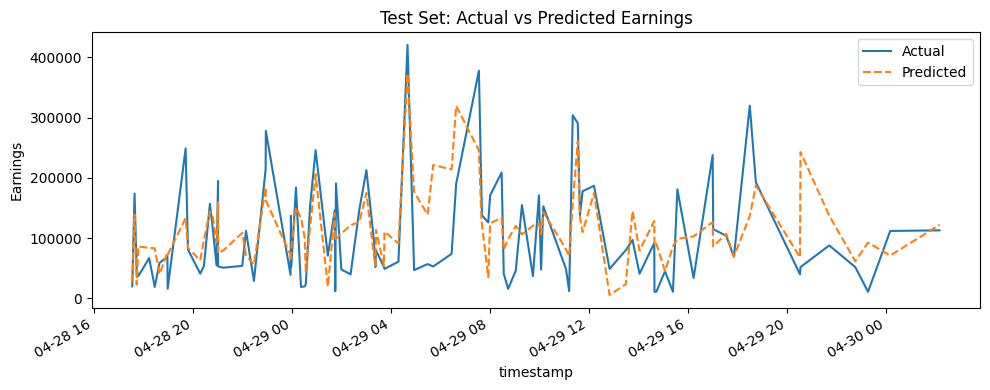

In [23]:
import matplotlib.pyplot as plt

# Convert test predictions into a Series with matching index
test_preds_series = pd.Series(preds, index=y_test_earnings.index)

plt.figure(figsize=(10, 4))
y_test_earnings.plot(label='Actual')
test_preds_series.plot(label='Predicted', linestyle='--')
plt.title("Test Set: Actual vs Predicted Earnings")
plt.ylabel("Earnings")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Train model_hours
model_hours = XGBRegressor(n_estimators=750, learning_rate=0.3, max_depth=3, random_state=42)
model_hours.fit(X_train_hours, y_train_hours)

# Evaluate
preds = model_hours.predict(X_test_hours)
print("MAE:", mean_absolute_error(y_test_hours, preds))
print("R² Score:", r2_score(y_test_hours, preds))

MAE: 0.006668590085037665
R² Score: -0.38327618014011167


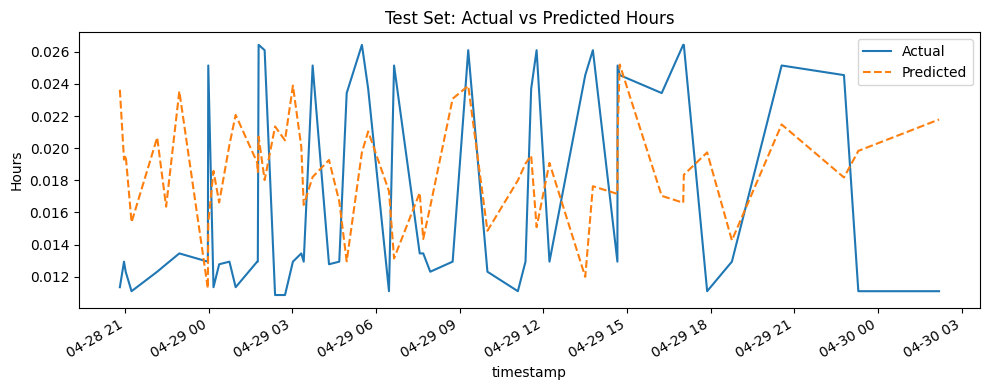

In [25]:
import matplotlib.pyplot as plt

# Convert test predictions into a Series with matching index
test_preds_series = pd.Series(preds, index=y_test_hours.index)

plt.figure(figsize=(10, 4))
y_test_hours.plot(label='Actual')
test_preds_series.plot(label='Predicted', linestyle='--')
plt.title("Test Set: Actual vs Predicted Hours")
plt.ylabel("Hours")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
joblib.dump(model_earnings, 'earnings_model.pkl')
joblib.dump(model_hours, 'hours_model.pkl')
# joblib.dump(model_hours, 'hours_model.pkl')

['hours_model.pkl']

In [27]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# import joblib

# # Feature selection
# X = df.drop(columns="earnings")
# y = df['earnings']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# model = RandomForestRegressor(n_estimators=50, random_state=42)
# model.fit(X_train, y_train)

# # Evaluate
# preds = model.predict(X_test)
# print("MAE:", mean_absolute_error(y_test, preds))
# print("R² Score:", r2_score(y_test, preds))

# # Save model
# # joblib.dump(model, 'earnings_model.pkl')

In [28]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# import joblib

# # --- Feature Selection ---
# X = df.drop(columns="earnings")
# y = df['earnings']

# # --- Train/Test Split ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Pipelines with CV ---
# models = {
#     "Random Forest": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', RandomForestRegressor(n_estimators=50, random_state=42))
#     ]),
#     "Gradient Boosting": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', GradientBoostingRegressor(n_estimators=50, random_state=42))
#     ]),
#     "Linear Regression": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', LinearRegression())
#     ])
# }

# results = {}

# print("Training and Evaluating Models...\n")

# for name, pipeline in models.items():
#     # Cross-validation
#     mae_scores = -cross_val_score(pipeline, X_train, y_train,
#                                   scoring='neg_mean_absolute_error', cv=5)
#     r2_scores = cross_val_score(pipeline, X_train, y_train,
#                                 scoring='r2', cv=5)

#     print(f"{name} - Avg MAE (CV): {mae_scores.mean():.2f}")
#     print(f"{name} - Avg R² (CV): {r2_scores.mean():.2f}\n")

#     # Fit on full train set and evaluate on test
#     pipeline.fit(X_train, y_train)
#     preds = pipeline.predict(X_test)
#     test_mae = mean_absolute_error(y_test, preds)
#     test_r2 = r2_score(y_test, preds)

#     results[name] = {
#         'pipeline': pipeline,
#         'cv_mae': mae_scores.mean(),
#         'cv_r2': r2_scores.mean(),
#         'test_mae': test_mae,
#         'test_r2': test_r2
#     }